In [210]:
from PIL import Image, ImageFilter
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

In [211]:
# load in image
i = '071318.jpg'
img = Image.open(i)

In [212]:
# resize and take a look
w,h = img.size
img = img.resize((w//3,h//3))

## How can we remove the background noise?

Bubble is dark/black with some white spots from reflections, and some light grey areas surrounding it. 
1. Apply a Gaussian blurring filter to remove some reflection noise
2. Apply threshold that is above all the surrounding greys, where white = 255 and black = 0

In [213]:
img = img.filter(ImageFilter.GaussianBlur(radius = 5))

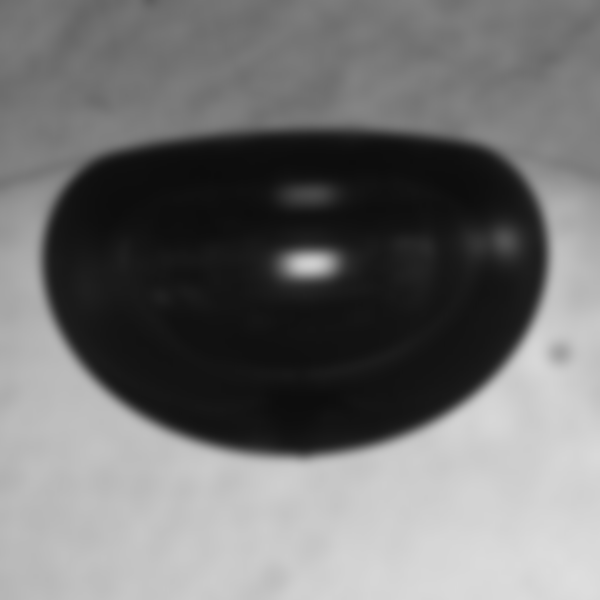

In [214]:
img

In [215]:
# set threshold for greyscale to B/W
threshold = 90

# convert image to a list of pixels
pixels = list(img.getdata())

def extract_color(lst):
    return np.array(list(zip(*lst))[0])

# determine if pixel is above threshold and set black, else set as white
pix = np.where(extract_color(pixels)<=threshold, 0,255)
pix = [(i,i,i) for i in pix]

newImg = Image.new(img.mode, img.size)

newImg.putdata(pix)
newImg.save('bw_bubble.jpg')

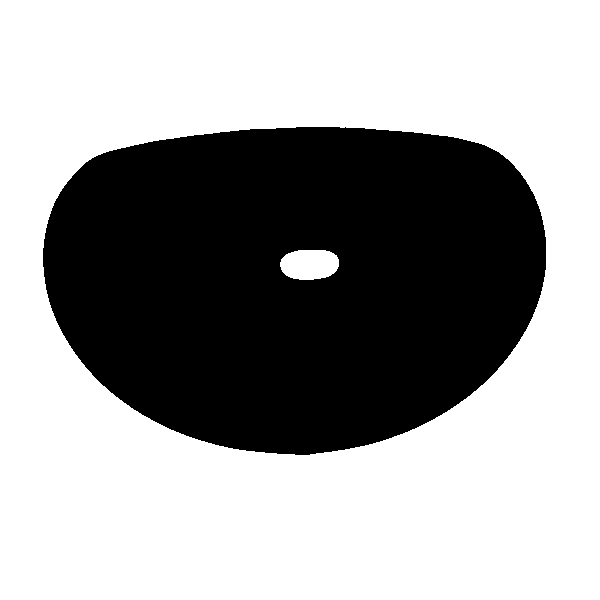

In [216]:
newImg

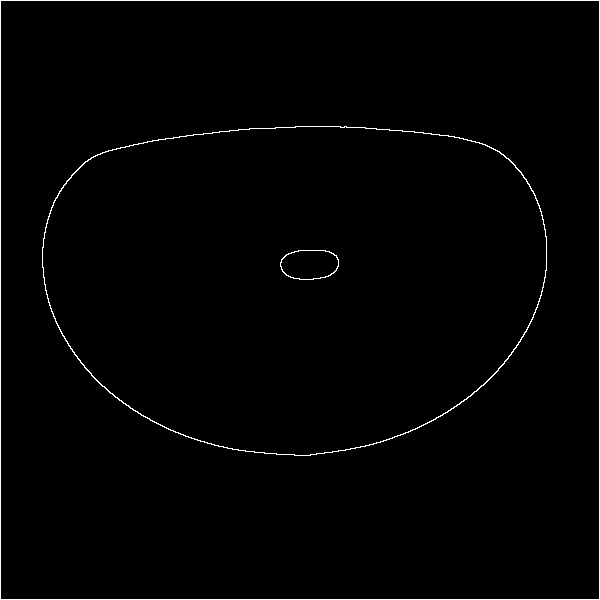

In [217]:
# Apply laplacian kernel filter
f = newImg.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,
                                          -1, -1, -1, -1), 1, 0))
f.save(r'filtered.jpg')
f

In [173]:
edges = np.where(r<250)
edges

array([     1,      5,      7, ..., 359992, 359994, 359998], dtype=int64)

In [186]:
img = Image.open('imgmap.bmp')
# ary = np.array(img)

In [311]:
width, height = f.size
# Setting the points for cropped image
left = 20
top = 20
right = 580
bottom = 580

In [381]:
width, height = f.size
# Setting the points for cropped image
left = 20
top = 25+sub1
right = 580
bottom = 20+sub2

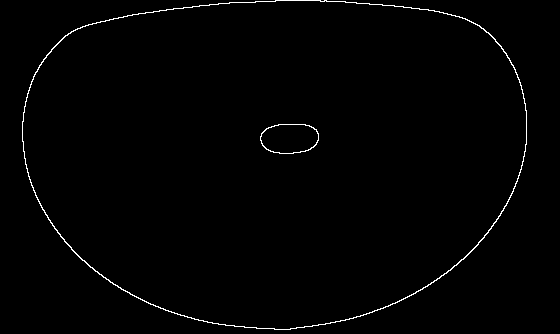

In [382]:
 
# Cropped image of above dimension
# (It will not change original image)
im1 = f.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.save(r'filt.jpg')
im1

In [318]:
sub1 = (y[0]//1) - 5
sub2 = (y[-1]//1) + 5

In [401]:
im1.size

(560, 334)

In [342]:
rr.size/560

339.0

In [339]:
np.array(np.where(rr!=0)).size

1842

In [390]:
rr[:560]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [516]:
splits = np.array_split(rr,334) # rows of pixels
idx = range(334)
rows = range(560)

x = []
y = []

for i in idx:
    for j in rows:
        if splits[i][j] == 255:
            if i > 100 and i < 200:
                if j > 200 and j < 400: continue
            y.append(i)
            x.append(j)
            
        
    

In [423]:
rr,_,_ = np.split(np.array(im1),3,axis=2)
rr=rr.reshape(-1) # column pixels

x = np.where(rr!=0)[0]
y = x/560
x = x/339

In [444]:
len(x)/2

In [514]:
# y = y[::-1]

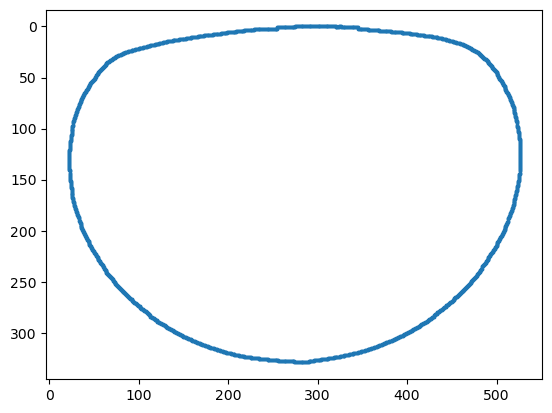

In [517]:
fig, ax = plt.subplots()
ax.scatter(x,y,s=3)
ax.invert_yaxis()

# plt.scatter(x,y)
# plt.invert_yaxis()

In [460]:
df['x'].max()/2

263.0

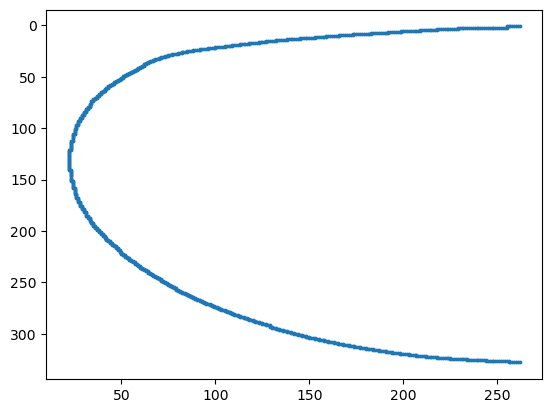

In [467]:
# plt.scatter(df2.x,df2.y)

fig, ax = plt.subplots()
ax.scatter(df2.x,df2.y,s=3)
ax.invert_yaxis()


In [477]:
df.to_csv('output.csv')

In [469]:
df=pd.DataFrame(columns=['x','y'])
df['x'] = x
df['y'] = y

df

,x,y
0,275,0
1,276,0
2,277,0
3,278,0
4,279,0
...,...,...
1663,286,329
1664,287,329
1665,288,329
1666,289,329


In [249]:
ary = np.array(img)
# r,_,_ = np.split(ary,3,axis=1)
# r=r.reshape(-1)
# len(r)
np.array(np.where(r==255))[0]

array([ 59637,  59639,  59680,  59684,  59686,  60176,  60177,  60178,
        60179,  60180,  60181,  60182,  60183,  60184,  60185,  60186,
        60187,  60188,  60189,  60190,  60191,  60193,  60195,  60242,
        60243,  60244,  60246,  60248,  60249,  60250,  60251,  60252,
        60253,  60254,  60255,  60256,  60257,  60258,  60259,  60260,
        60261,  60262,  60263,  60264,  60710,  60712,  60713,  60714,
        60715,  60716,  60717,  60718,  60719,  60720,  60721,  60722,
        60723,  60724,  60725,  60726,  60727,  60728,  60730,  60731,
        60733,  60734,  60735,  60825,  60827,  60829,  60830,  60832,
        60834,  60836,  61259,  61261,  61262,  61265,  61267,  61268,
        61269,  61398,  61409,  61811,  61813,  61814,  61817,  61818,
        61969,  61972,  61973,  61975,  61977,  61978,  61980,  62360,
        62361,  62362,  62363,  62364,  62365,  62366,  62367,  62369,
        62542,  62544,  62545,  62546,  62547,  62548,  62549,  62550,
      

In [438]:
df[df['y']==10]

,x,y
283,159,10
284,160,10
285,161,10
286,162,10
287,163,10
288,164,10
289,165,10
290,166,10
291,428,10
292,429,10


In [220]:
ary = np.array(img)

r,_,_ = np.split(ary,3,axis=2)
r=r.reshape(-1)
# g=r.reshape(-1)
# b=r.reshape(-1)
np.array(np.where(r!=0))

array([[ 58432,  58435,  58438, ..., 246153, 246156, 246159]], dtype=int64)

In [140]:
img = Image.open('filtered.jpg')
ary = np.array(img)

# Split the three channels
r,g,b = np.split(ary,3,axis=2)
r=r.reshape(-1)
g=r.reshape(-1)
b=r.reshape(-1)
r

array([255, 240, 255, ..., 255, 240, 255], dtype=uint8)

In [141]:
img = Image.open('filtered.jpg')
ary = np.array(img)

# Split the three channels
r,g,ba = np.split(ary,3,axis=2)
r=r.reshape(-1)
g=r.reshape(-1)
b=r.reshape(-1)

# Standard RGB to grayscale 
bitmap = list(map(lambda x: 0.299*x[0]+0.587*x[1]+0.114*x[2], zip(r,g,b)))
bitmap = np.array(bitmap).reshape([ary.shape[0], ary.shape[1]])
bitmap = np.dot((bitmap > 128).astype(float),255)
im = Image.fromarray(bitmap.astype(np.uint8))
im.save('imgmap.bmp')

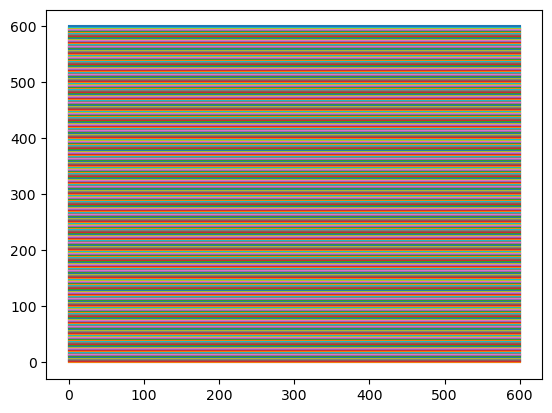

In [33]:
nx,ny = (601,601)

x = np.linspace(0, 600, nx)
y = np.linspace(0, 600, ny)

# full coordinate arrays

xx, yy = np.meshgrid(x, y)
plt.plot(xx,yy)
plt.show()

In [11]:
im = cv.imread('filtered.jpg')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
cv.drawContours(im, contours, -1, (0,255,0), 3)
cv.imshow('Contour',im)
cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
len(approx)

56

In [12]:
cnt = contours[0]

epsilon = 0.01*cv.arcLength(cnt,True)
approx = cv.approxPolyDP(cnt,epsilon,True)

In [ ]:
# import cv2 as cv


# image= cv.imread('filtered.jpg')
# original_image= image

# gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# edges= cv2.Canny(gray, 50,200)


# contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    accuracy= 0.0001 * cv.arcLength(c, True)
    approx= cv.approxPolyDP(c,accuracy,True)
    cv.drawContours(im, [approx], 0, (0,255,0),2)
    cv.imshow('Approximated Contours', im)
    
cv.destroyAllWindows()
cv.waitKey(0)

In [491]:
5*np.cos(t) + 0.2*np.random.normal(size=N) + 1

array([ 5.95627642,  5.88774004,  5.71748734,  6.03727124,  5.9540422 ,
        5.97005498,  5.86438684,  5.63360141,  6.15548183,  5.88729292,
        5.91637527,  5.6951017 ,  6.08371305,  5.62584126,  5.66764212,
        5.55313323,  5.47548022,  5.81351988,  5.52997198,  5.37644344,
        5.50802142,  5.43852776,  5.45768022,  5.28766674,  5.40049103,
        4.97192316,  5.06628261,  5.33415106,  5.30226287,  4.72141393,
        5.08936183,  4.94461409,  5.11649518,  4.61233674,  4.83008821,
        4.85268312,  4.34128778,  4.40906408,  4.6529075 ,  4.34519498,
        4.49080198,  4.26736   ,  3.88013938,  4.09350015,  4.06691613,
        3.79435789,  4.02374852,  3.47043998,  3.63361424,  3.49100491,
        3.30251523,  3.08309333,  2.87617052,  2.94221168,  3.05599157,
        2.88090099,  2.86894887,  2.75636181,  2.61134424,  2.64838759,
        2.67281344,  2.10723434,  2.35431195,  1.87533204,  2.53653211,
        1.81345344,  1.81736461,  1.96377701,  1.77051072,  1.76

In [503]:
U, s, V

(array([[ 0.86891901, -0.4949543 ],
        [ 0.4949543 ,  0.86891901]]),
 array([315.95461279]),
 array([[1.]]))

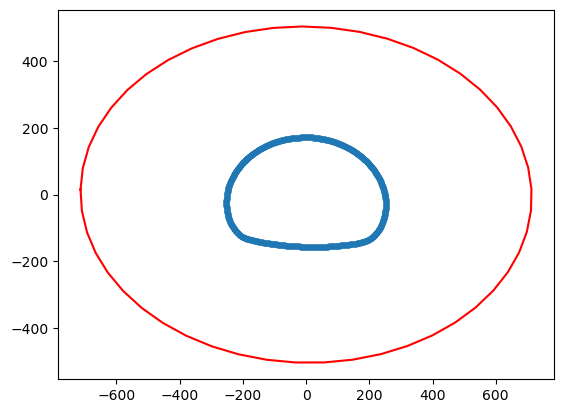

In [509]:
N = 200
t = np.linspace(0, 2*np.pi, N)
# x = 5*np.cos(t) + 0.2*np.random.normal(size=N) + 1
# y = 4*np.sin(t+0.5) + 0.2*np.random.normal(size=N)
x = np.array(x)
y = np.array(y)

plt.plot(x, y, '.')     # given points

xmean, ymean = x.mean(), y.mean()
x = x - xmean
y = y - ymean
U, S, V = np.linalg.svd(np.stack((x, y)))

tt = np.linspace(0, 2*np.pi, 50)
circle = np.stack((np.cos(tt), np.sin(tt)))    # unit circle
transform = np.sqrt(2/N) * U.dot(np.diag(S))   # transformation matrix
fit = transform.dot(circle) + np.array([[xmean], [ymean]])
plt.plot(fit[0, :], fit[1, :], 'r')
plt.show()